# Problem Statement: 

To build a classification model to predict the wine quality.

In [169]:
#Importing the necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Loading the Data:

In [170]:
df=pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Remarks: Looking at the above data frame,we can see that the column quality is the target label making the remaining columns as the features that we can customize and use to predict our label. This classifies to be a Classification problem.

# Understanding the Datasets:

There are 12 columns in the dataset namely:

1. Fixed acidity: It shows that most acids involved with wine are fixed or nonvolatile (do not evaporate readily)


2. Volatile acidity: It gives the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste


3. Citric acid: Found in small quantities, citric acid can add ‘freshness’ and flavor to wines


4. Residual sugar: The amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet


5. Chlorides: The amount of salt in the wine


6. Free sulfur dioxide: The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine


7. Total sulfur dioxide: The amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine


8. Density: The density of water is close to that of water depending on the percent alcohol and sugar content


9. pH: Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale


10. Sulphates: A wine additive which can contribute to sulfur dioxide gas (S02) levels, which acts as an antimicrobial and antioxidant


11. Alcohol: The percent alcohol content of the wine


Output variable (based on sensory data): 12. Quality: Wine quality refers to the factors that go into producing a wine, as well as the indicators or characteristics that tell you if the wine is of high quality (score between 0 and 10).

In [171]:
#checking the first 5 rows of the dataset

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [172]:
#checking the last 5 rows of the dataset

df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [173]:
#checking the dimension of dataset

df.shape

(1599, 12)

In [174]:
# checking the column names

df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Preparing Data for Analysis:

In [175]:
# checking datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Remarks: Here we can see the names of all columns present in the dataset along with the non-null count and data type of those colums. No object or string data is present so encoding is not required.

In [176]:
#checking for null values

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Remarks: We see that there are no null values present in any column of the dataset, so we don't need to worry about missing data.

# Summary Statistics of the Dataset:

In [177]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Key Observations:
    
    1. Count for all the features are same, so no data is missing.
    
    2. The mean is more than median(50th Percentile) in all columns.
    
    3. There is a large difference in 75th Percentile and max in residual sugar, free sulfur dioxide, and total sulfur dioxide.
    
    4. The observations 2 and 3 indicates that there are extreme outliers present in these three columns. Therefore,we have to remove these outliers to get a better model accuracy. 


# Exploring Data Variable

In [178]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Remarks: 

Target/ dependent variable is discrete and categorical in nature.

quality score scale ranges from 3 to 8; where 3 is low quality and 8 is the best quality.

In [179]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Observations:
    
quality has most values concentrated in the categories of 5,6, and 7.

Few observations are present in the categories 3 and 8.

# Exploratory Data Analysis (EDA)

# Heatmap :

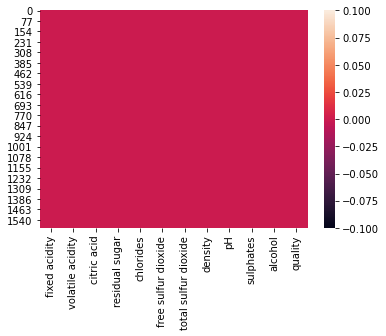

In [180]:
# UNIVARIATE ANALYSIS
# Visualizing null values with the help of heatmap

sns.heatmap(df.isnull())
plt.show()

Remarks: Dataset has no missing values. If there were any, we would have noticed in figure indicated by different colour shade.

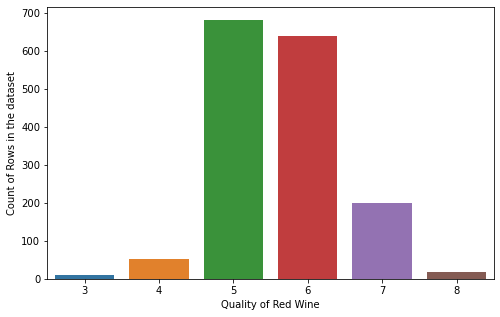

In [181]:
#UNIVARIATE ANALYSIS
# checking quality with countplot

plt.figure(figsize=(8,5))
sns.countplot(x ='quality', data = df)
plt.xlabel('Quality of Red Wine')
plt.ylabel('Count of Rows in the dataset')
plt.show()

Remarks: In the countplot representation we see the various categories of red wine quality and it shows that the number of data present for quality score 5 and 6 is way higher than its counterparts. This indicates an imbalance which is to be rectified so that our machine learning model do not get biased to a certain value during prediction.

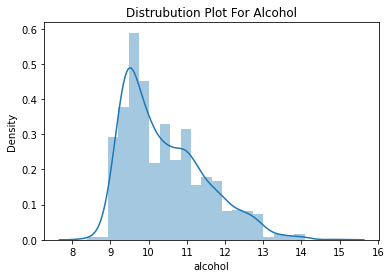

In [182]:
#Checking Alcohol with distplot
sns.distplot(df["alcohol"])
plt.title('Distrubution Plot For Alcohol')
plt.show()

Remarks: It shows that alcohol is not normally distributed. It is right skewed.

In [183]:
#Similarly Checking all other features with distribution plot

features = df.iloc[:,2:].columns
print(features)
print(len(features))

Index(['citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')
10


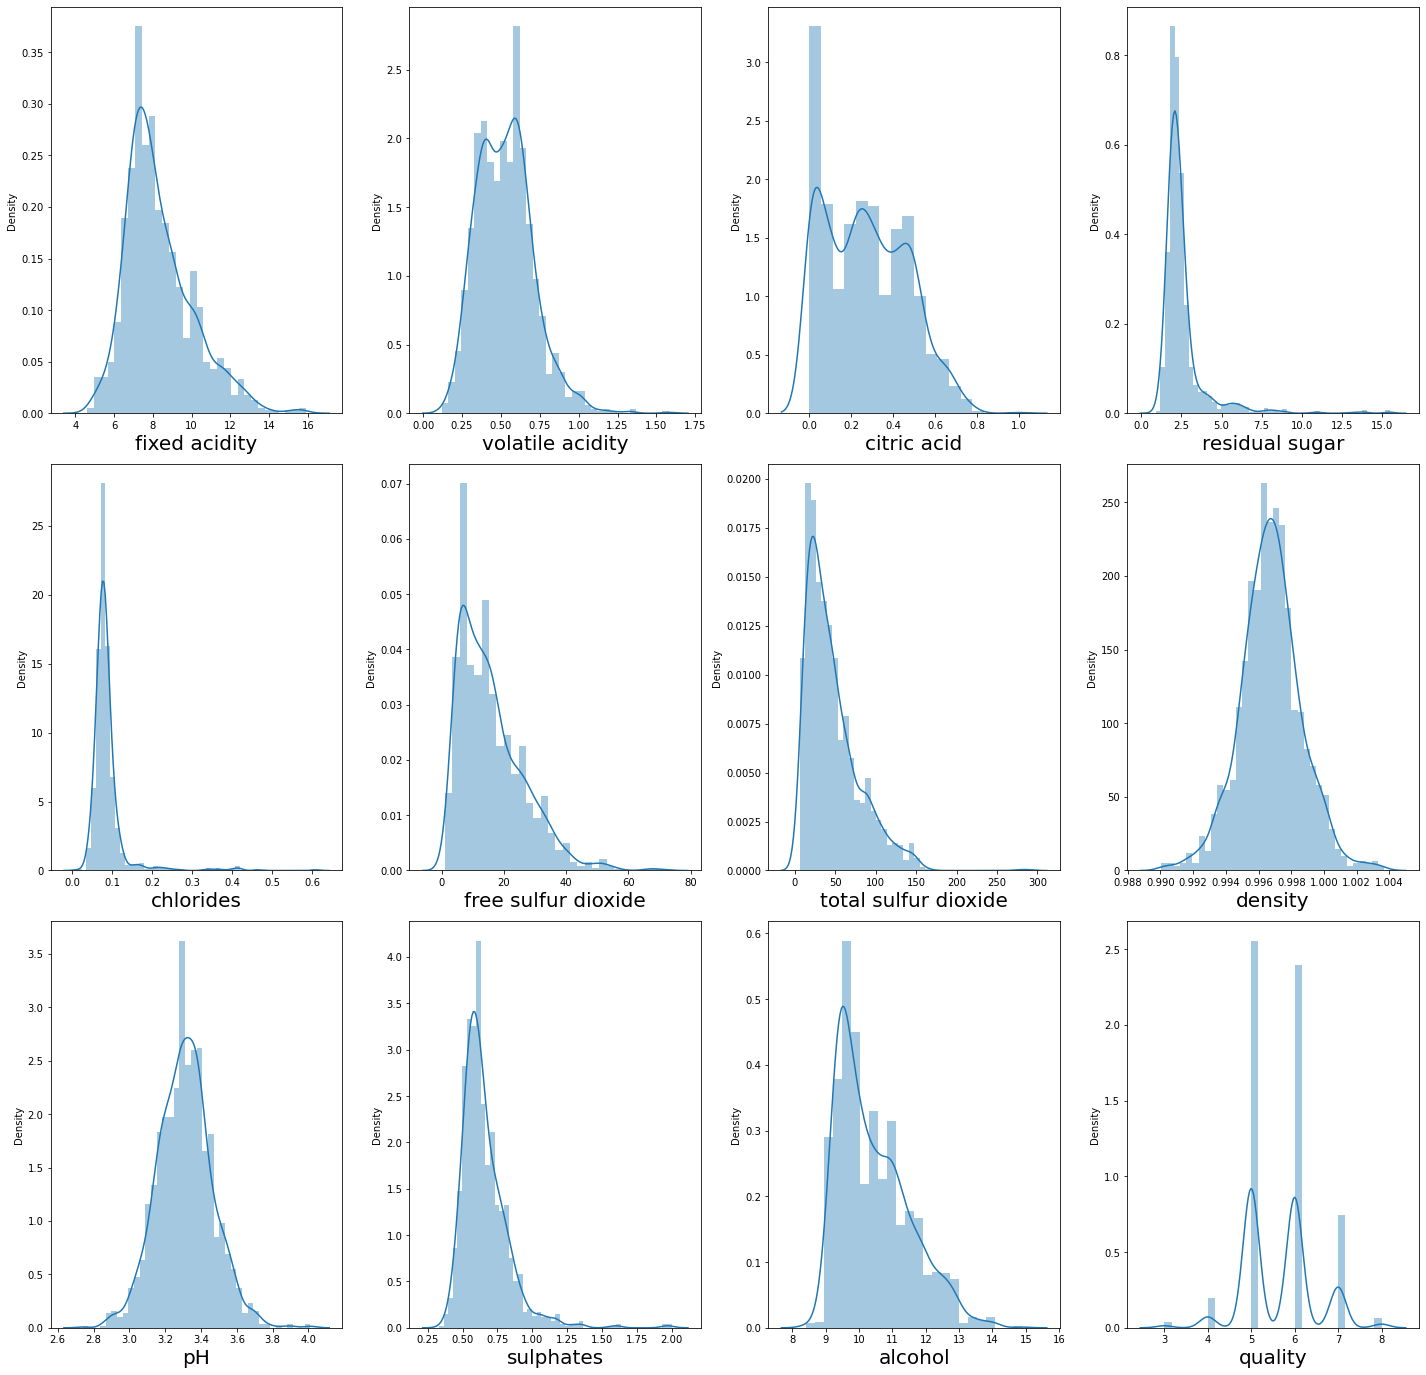

In [184]:
plt.figure(figsize=(20,25))

plotnumber=1

for column in df:
    if plotnumber<=16 : 
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column , fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

Remarks: The distribution plots show that few of the columns are in normal distribution category showing a proper bell shape curve. However, we do see skewness in most of the feature columns like citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates and alcohol columns. We are going to ignore the label column since it is a categorical column and will need to fix the imbalance data inside it.

With respect to the treatment of skewness and outliers, we will perform the removal or treatment after we see the accuracy dependency of the machine learning models.

# Bivariate Analysis:

# Scatterplot

<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

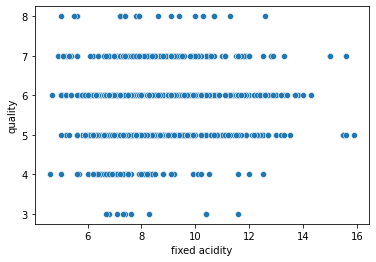

In [185]:
sns.scatterplot(x="fixed acidity",y="quality",data=df)

Remarks: The outcome shows that the fixed acidity for quality 5 and 7 is high lying in between 3 to 15.

<AxesSubplot:xlabel='volatile acidity', ylabel='quality'>

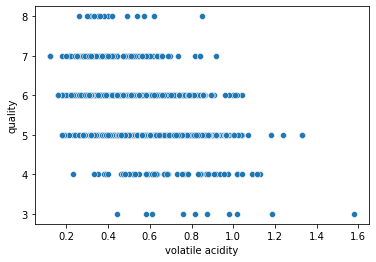

In [186]:
sns.scatterplot(x="volatile acidity",y="quality",data=df)

Remarks: Most of the quality 5 wine is having voltile acidity lying between 0.1 to 1.4. For quality 6, it is between 0.1 to 1.1; for quality 7, it is between 0.1 to 1.0; for quality 8, it is between 0.2 to 0.9; for quality 4, it is between 0.2 to 1.2; and for quality 3, it is between 0.4 to 1.6 and is the highest among all the other quality wines.

<AxesSubplot:xlabel='citric acid', ylabel='quality'>

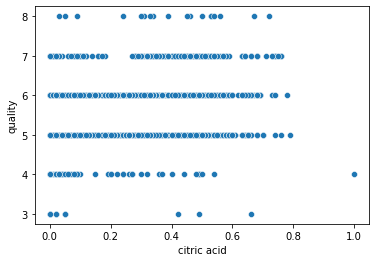

In [187]:
sns.scatterplot(x="citric acid",y="quality",data=df)

Remarks: The quality 4 has the highest amount of citric acid lying in between 0.0 to 1.0; and is least for quality 3 lying in between 0.0 to 0.7  

<AxesSubplot:xlabel='residual sugar', ylabel='quality'>

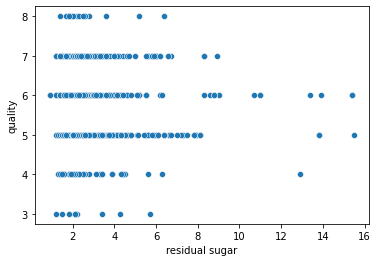

In [188]:
sns.scatterplot(x="residual sugar",y="quality",data=df)

Remarks: The quality 5 and 6 has the highest residual sugar falling within the range 0.5 to 15.5. For quality 3 and 8, it falls in the range 1.0 to 6.5. For quality 7, it falls under 1.0 to 9.0; and for quality 4, it falls under 1.0 to 13.0.

<AxesSubplot:xlabel='chlorides', ylabel='quality'>

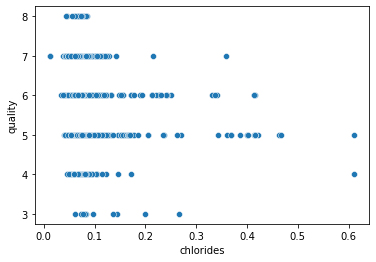

In [189]:
sns.scatterplot(x="chlorides",y="quality",data=df)

Remarks: The chlorides value ranges from 0.02 to 0.61 for quality 4 and 5. It ranges from 0.0 to 0.38 for quality 7; from 0.03 to 0.1 for quality 8; from 0.02 to 0.42 for quality 6; and from 0.05 to 0.28 for quality 3. 

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='quality'>

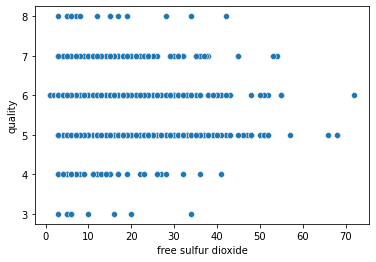

In [190]:
sns.scatterplot(x="free sulfur dioxide",y="quality",data=df)

Remarks: The free sulfur dioxide value ranges from 0 to 72 for quality 6. It ranges from 1 to 70 for quality 5; from 2 to 55 for quality 7; from 1 to 43 for quality 8; from 1 to 42 for quality 4; and from 1 to 35 for quality 3. 

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='quality'>

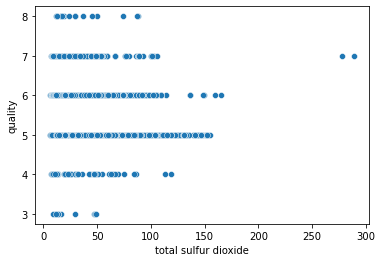

In [191]:
sns.scatterplot(x="total sulfur dioxide",y="quality",data=df)

Remarks: The total sulfur dioxide concentration is highest for quality 7 ranging from 0 to 300; and is least for quality 3 ranging in between 0 to 50. For quality 5 and 6, it falls in between 0 to 175; for quality 8, it falls within 0 to 100; and for quality 4, it falls within 0 to 125. 

<AxesSubplot:xlabel='density', ylabel='quality'>

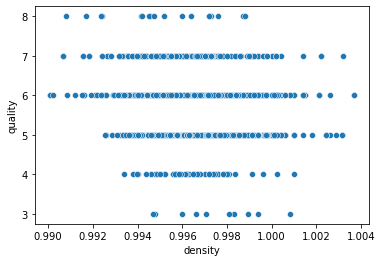

In [192]:
sns.scatterplot(x="density",y="quality",data=df)

Remarks: The outcome shows with the density of 0.990 to 1.002, maximum quality lies.

<AxesSubplot:xlabel='pH', ylabel='quality'>

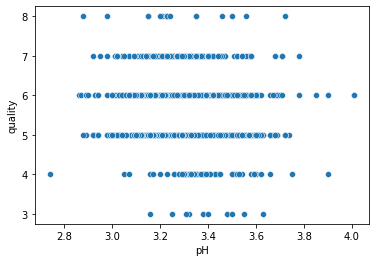

In [193]:
sns.scatterplot(x="pH",y="quality",data=df)

Remarks: The outcome shows with pH of 2.8 to 3.8, maximum quality lies.

<AxesSubplot:xlabel='sulphates', ylabel='quality'>

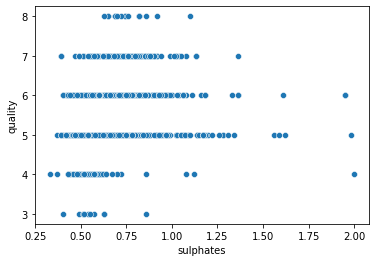

In [194]:
sns.scatterplot(x="sulphates",y="quality",data=df)

Remarks: The outcome shows with sulphates concentration of 0.30 to 1.30, maximum quality lies.

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

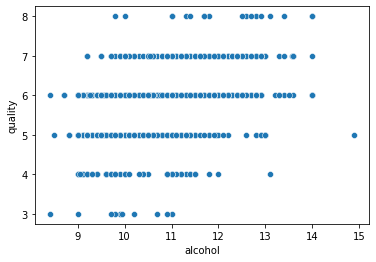

In [195]:
sns.scatterplot(x="alcohol",y="quality",data=df)

Remarks: The outcome shows with the alcohol concentration of 9 to 14, maximum quality lies.

# Barplot

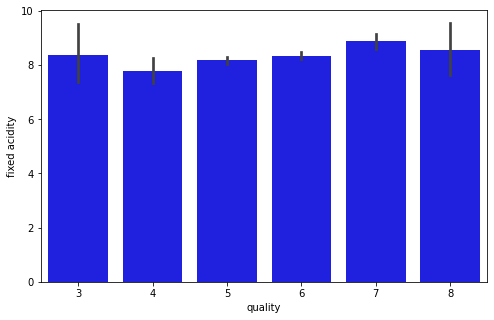

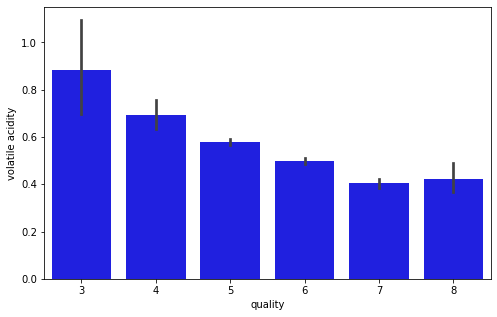

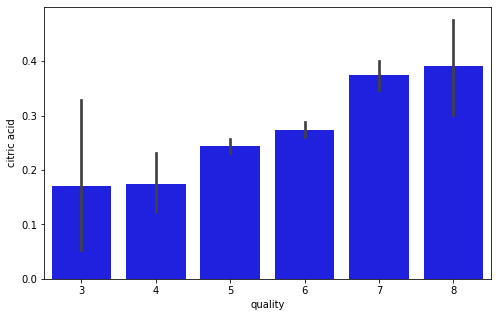

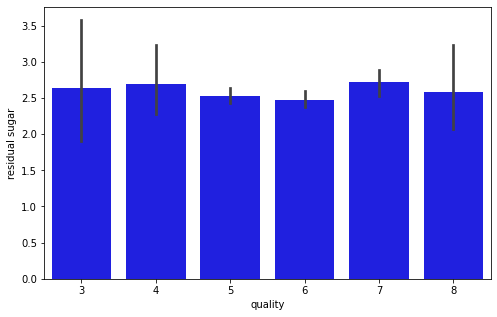

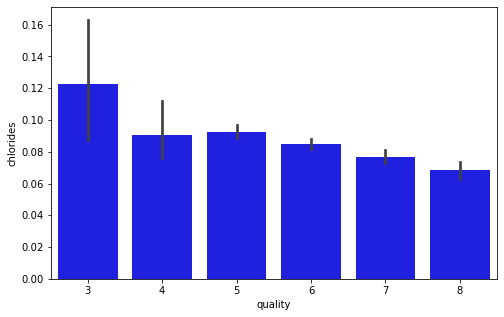

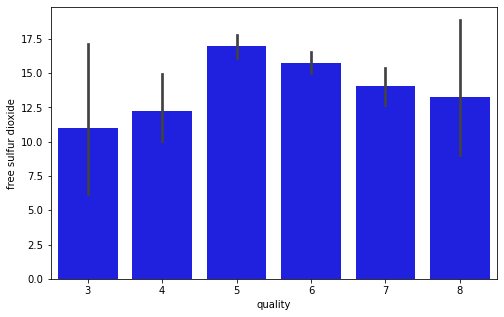

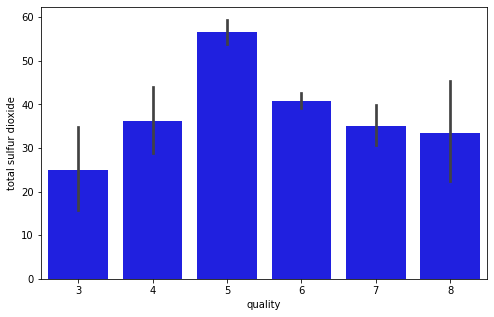

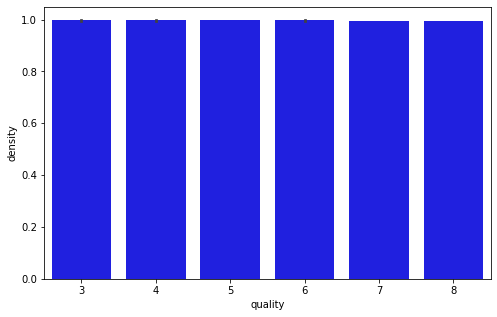

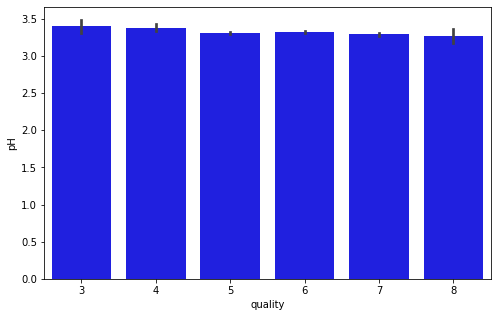

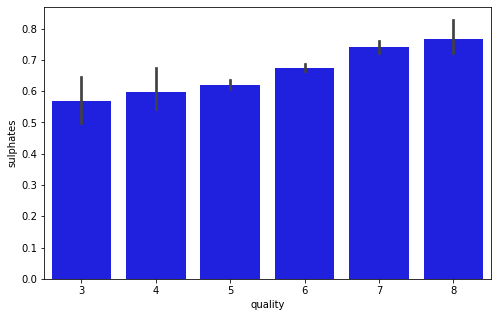

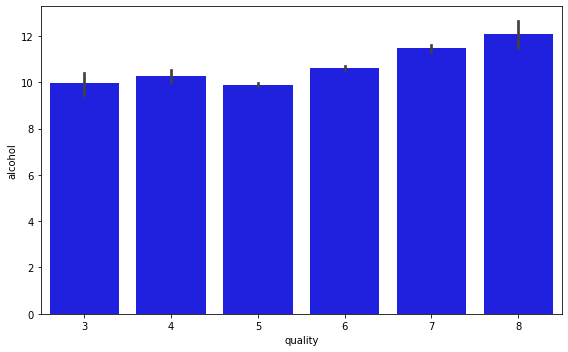

In [196]:
index=0
labels = df['quality']
features = df.drop('quality', axis=1)

for col in features.items():
    plt.figure(figsize=(8,5))
    sns.barplot(x=labels, y=col[index], data=df, color="blue")
plt.tight_layout()
plt.show()

With the feature vs label barplot, we are able to see the trend corresponding to the impact each has with respect to predicting the quality column (our target variable).

Observations regarding feature compared to the label are:

1.fixed acidity vs quality -> no fixed pattern

2.volatile acidity vs quality -> there is a decreasing trend

3.citric acid vs quality -> there is an increasing trend

4.residual sugar vs quality -> no fixed pattern

5.chlorides vs quality -> there is a decreasing trend

6.free sulfur dioxide vs quality -> no fixed pattern as it is increasing then decreasing

7.total sulfur dioxide vs quality -> no fixed pattern as it is increasing then decreasing

8.density vs quality -> no pattern at all

9.pH vs quality -> no pattern at all

10.sulphates vs quality -> there is an increasing trend

11.alcohol vs quality -> there is an increasing trend

Hence, we can conclude that to get better quality wine citric acid, sulphates and alcohol columns play a major role.

# Pairplot:

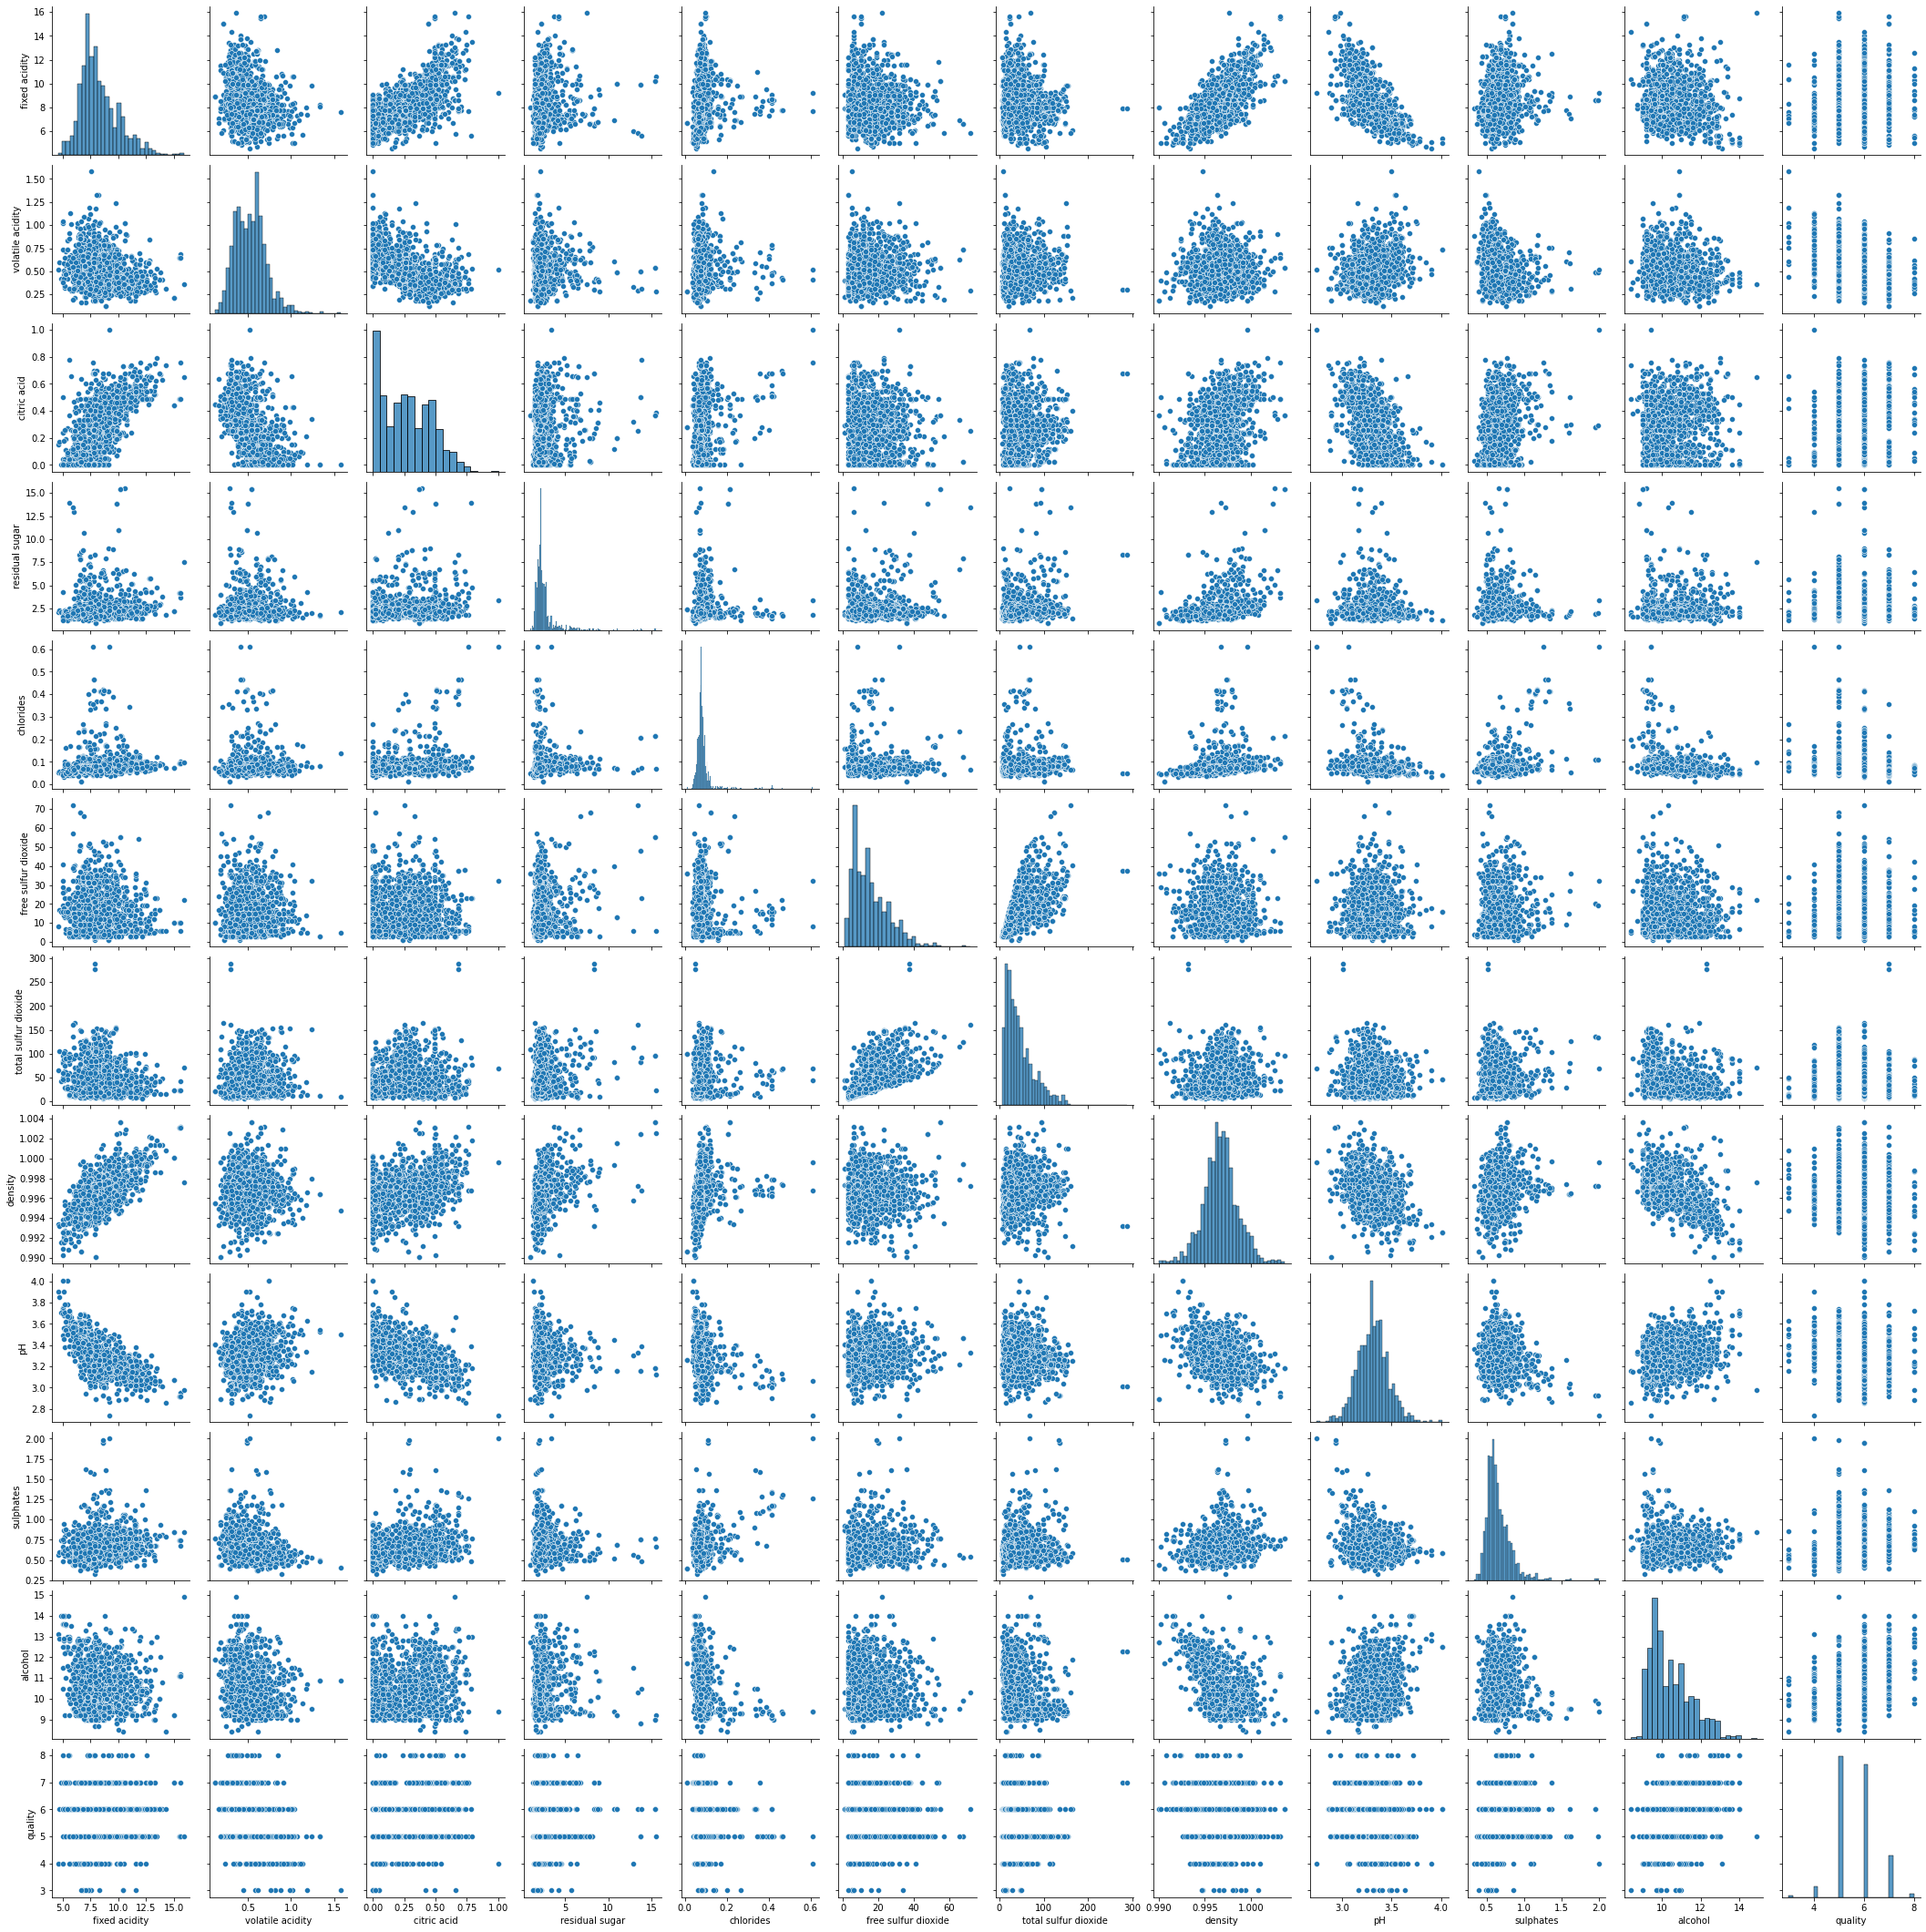

In [197]:
sns.pairplot(df)

Remarks: We can see some columns are negatively correlated to quality

# Checking Correlation

Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

In [198]:
df_corr= df.corr()
df_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


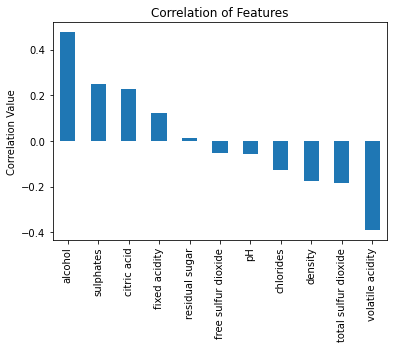

In [199]:
#Checking correlation of features using bar plot
df_corr['quality'].sort_values(ascending=False).drop(['quality']).plot.bar()
plt.title('Correlation of Features')
plt.ylabel('Correlation Value')
plt.show()

<AxesSubplot:>

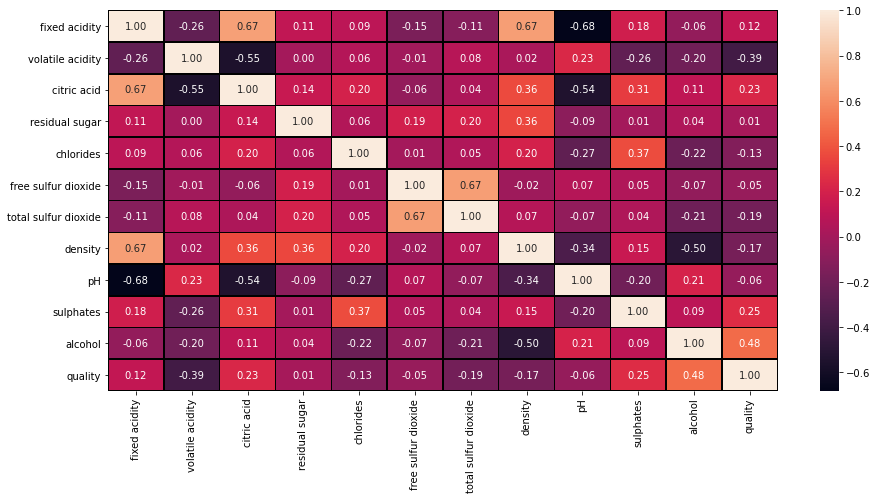

In [200]:
#MULTIVARIATE ANALYSIS
# Visualizing Correlation heatmap

plt.figure(figsize=(15,7))
sns.heatmap(df_corr, annot=True, linewidths=0.5,linecolor="black", fmt= '.2f')

Observations:
    
From the above result, it is clear that some columns are making positive correlation while some columns are making negative correlation.

1. quality is highly correlated with alcohol.
2. alcohol is highly negatively correlated with density with -0.5.
3. density is highly positively correlated with residual sugar.
4. volatile acidity is negatively correlated with quality.
5. free sulphuric acid is highly correlated with total sulfur dioxide.
 
The positively correlated columns has a great impact on the target column while the negative correlated has less or zero impact on the target column.


# Checking Skewness

In [201]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

Remarks: We see the skewness information present in our dataset. We will ignore quality since it is our target label in the dataset. Now, looking at all the feature columns we see that fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, sulphates and alcohol are all outside the acceptable range of +/-0.5. This skewness indicates outliers being present in our dataset that will need to be treated if required.

# Checking Outliers with Boxplot:

In [202]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:>

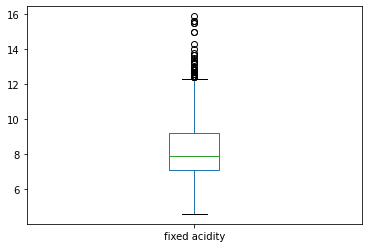

In [203]:
#Univariate Analysis

df['fixed acidity'].plot.box()

<AxesSubplot:>

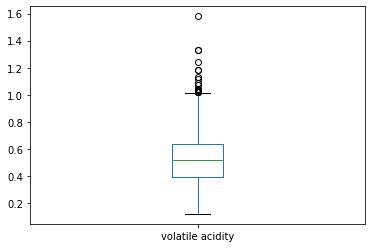

In [204]:
df['volatile acidity'].plot.box()

<AxesSubplot:>

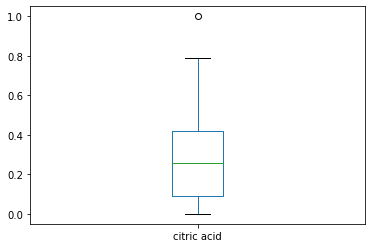

In [205]:
df['citric acid'].plot.box()

<AxesSubplot:>

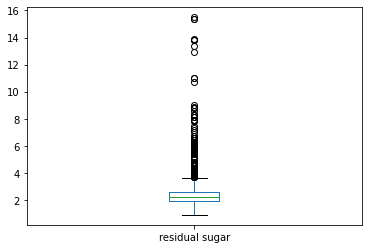

In [206]:
df['residual sugar'].plot.box()

<AxesSubplot:>

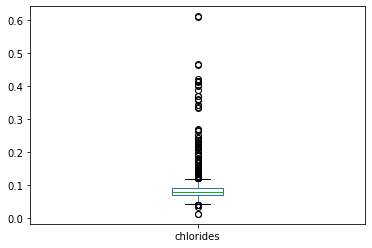

In [207]:
df['chlorides'].plot.box()

<AxesSubplot:>

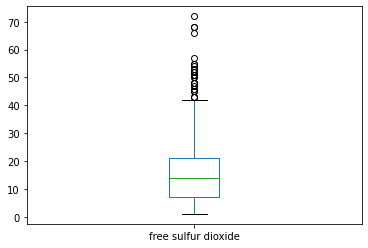

In [208]:
df['free sulfur dioxide'].plot.box()

<AxesSubplot:>

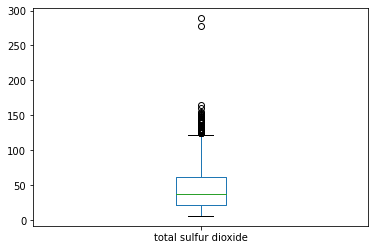

In [209]:
df['total sulfur dioxide'].plot.box()

<AxesSubplot:>

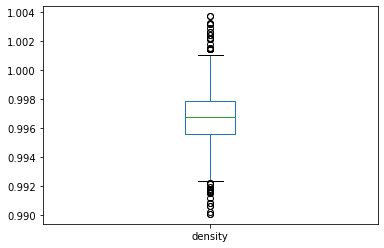

In [210]:
df['density'].plot.box()

<AxesSubplot:>

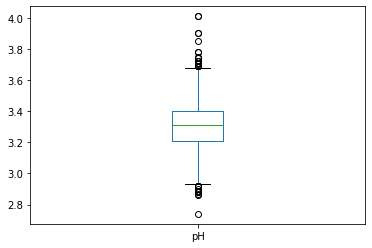

In [211]:
df['pH'].plot.box()

<AxesSubplot:>

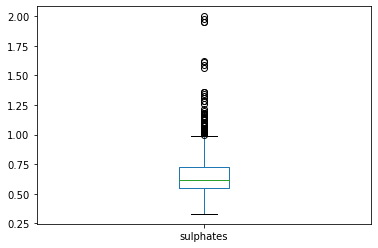

In [212]:
df['sulphates'].plot.box()

<AxesSubplot:>

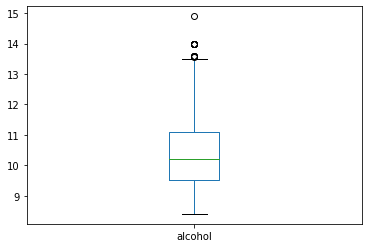

In [213]:
df['alcohol'].plot.box()

<AxesSubplot:>

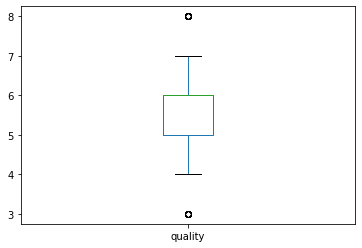

In [214]:
df['quality'].plot.box()

fixed acidity              AxesSubplot(0.125,0.536818;0.110714x0.343182)
volatile acidity        AxesSubplot(0.257857,0.536818;0.110714x0.343182)
citric acid             AxesSubplot(0.390714,0.536818;0.110714x0.343182)
residual sugar          AxesSubplot(0.523571,0.536818;0.110714x0.343182)
chlorides               AxesSubplot(0.656429,0.536818;0.110714x0.343182)
free sulfur dioxide     AxesSubplot(0.789286,0.536818;0.110714x0.343182)
total sulfur dioxide          AxesSubplot(0.125,0.125;0.110714x0.343182)
density                    AxesSubplot(0.257857,0.125;0.110714x0.343182)
pH                         AxesSubplot(0.390714,0.125;0.110714x0.343182)
sulphates                  AxesSubplot(0.523571,0.125;0.110714x0.343182)
alcohol                    AxesSubplot(0.656429,0.125;0.110714x0.343182)
quality                    AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

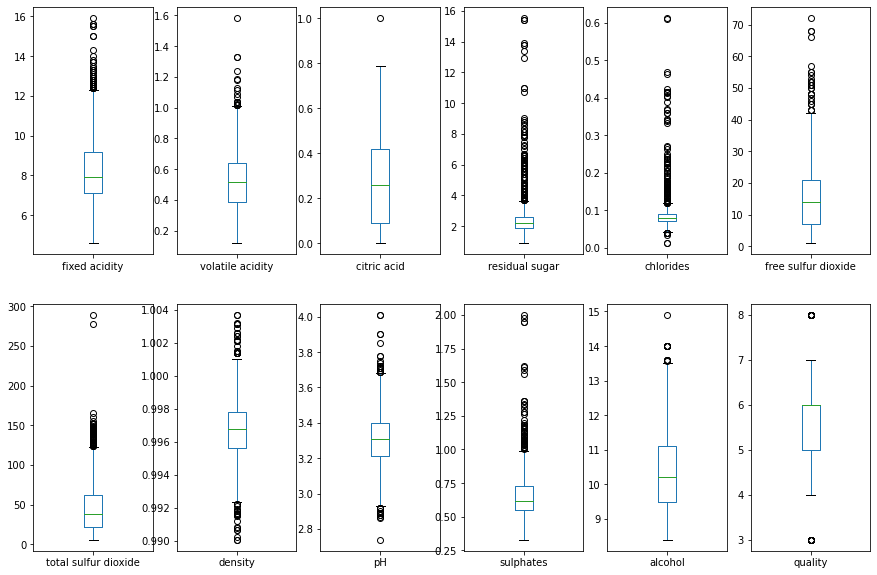

In [215]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(15,10))

Observations: With the help of the above boxplots we are able to see the whisker details and outliers clearly. We are going to ignore the continous outlier sections but the outliers that are single values and far away from the whiskers of the boxplot may need to be treated depending upon further analysis. Currently, we are trying to retain as much as data which is possible in the given dataset.

# Dropping a column:

We observed that free sulfur dioxide and total sulfur dioxide are both indicating towards the same feature of sulfur dioxide therefore we are dropping the total option and keeping just the free option in our dataset.

In [216]:
df_new = df.drop(columns='total sulfur dioxide', axis=1)
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5


# Outliers removal:

In [217]:
#Checking the number of columns and rows before removing the outliers from the dataset.

df.shape

(1599, 12)

In [218]:
# Z score method

from scipy.stats import zscore
z=np.abs(zscore(df_new))
threshold=3
np.where(z>3)

(array([  13,   14,   15,   17,   17,   19,   33,   38,   42,   43,   45,
          57,   81,   81,   83,   86,   88,   91,   92,   95,  106,  106,
         120,  126,  127,  142,  144,  147,  151,  151,  151,  151,  163,
         164,  169,  169,  181,  199,  226,  226,  240,  243,  244,  258,
         258,  274,  281,  291,  324,  325,  339,  340,  347,  374,  381,
         391,  396,  396,  400,  400,  442,  442,  451,  459,  467,  480,
         480,  494,  517,  544,  554,  554,  555,  555,  557,  557,  568,
         584,  588,  595,  608,  614,  639,  649,  652,  652,  652,  672,
         690,  690,  692,  692,  695,  723,  724,  730,  754,  776,  777,
         795,  821,  832,  836,  837,  889,  899,  911,  917,  923,  925,
         926,  982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1081,
        1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244, 1244,
        1260, 1269, 1269, 1270, 1270, 1288, 1289, 1295, 1296, 1299, 1299,
        1300, 1312, 1316, 1319, 1319, 

In [219]:
df_WO=df_new[(z<3).all(axis=1)]
df_WO

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5


Remarks: We have used the Z score method to get rid of outliers present in our dataset that are not in the acceptable range of +/-0.5 value of skewness.

In [220]:
#Checking the number of rows present in the dataset after applying the outlier removal technique

df_WO.shape

(1460, 11)

# Percentage loss of data while removing outliers:

In [221]:
percentage_loss=((1599-1460)/1599)*100
print(percentage_loss)

8.692933083176985


# Preparing Data for Model

In [222]:
X = df_WO.drop('quality', axis=1)
Y = df_WO['quality']

Remarks: We have bifurcated the dataset into features and labels where X represents all the feature columns and Y represents the target label column.

# Handling class imbalance:

In [223]:
Y.value_counts()

5    624
6    588
7    185
4     47
8     16
Name: quality, dtype: int64

Remarks: Listing the values of our label column to count the number of rows occupied by each category. This indicates class imbalance that we will need to fix by using the oversampling method.

In [224]:
# adding samples to make all the categorical quality values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)


Remarks: SMOTE is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value.

In [225]:
Y.value_counts()

7    624
5    624
8    624
6    624
4    624
Name: quality, dtype: int64

Remarks: After applying over sampling,we are again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.

In [226]:
#Checking the label

Y

0       5
1       5
2       5
3       6
4       5
       ..
3115    8
3116    8
3117    8
3118    8
3119    8
Name: quality, Length: 3120, dtype: int64

# Label Binarization

In [227]:
Y = Y.apply(lambda y_value:1 if y_value>=7 else 0) # 1 is for good quality and 0 for bad quality

# Displaying the label after applying label binarization

Y

0       0
1       0
2       0
3       0
4       0
       ..
3115    1
3116    1
3117    1
3118    1
3119    1
Name: quality, Length: 3120, dtype: int64

Remarks: Using the label binarization technique, we have tagged the categories present in our target label to 2 major class that are 0 for bad quality wine and 1 for good quality wine.

In [228]:
X # Checking all the features except the label

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...
3115,9.899938,0.376669,0.476663,2.295215,0.069238,5.380982,0.996423,3.226196,0.665239,11.266687
3116,6.003340,0.740202,0.106019,1.489631,0.051498,13.120388,0.992801,3.488295,0.793111,12.563884
3117,7.230419,0.330174,0.331738,1.707822,0.061078,3.017382,0.996010,3.229305,1.096089,10.008691
3118,9.009047,0.411694,0.488306,1.789605,0.070324,7.129933,0.994562,3.219095,0.693378,12.510395


# Feature Scaling

In [229]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X # Displaying all the features after applying scaling technique to avoid bias output

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
0,-0.642657,1.007313,-1.508149,-0.600268,-0.132070,-0.285193,0.844083,1.477166,-0.781248,-1.253632
1,-0.390808,2.001421,-1.508149,0.174267,1.086033,1.242464,0.248549,-0.764652,0.118936,-0.891882
2,-0.390808,1.338683,-1.300810,-0.157677,0.753823,0.151281,0.367656,-0.330751,-0.106110,-0.891882
3,1.749908,-1.312271,1.394605,-0.600268,-0.187438,0.369518,0.963190,-1.053919,-0.631217,-0.891882
4,-0.642657,1.007313,-1.508149,-0.600268,-0.132070,-0.285193,0.844083,1.477166,-0.781248,-1.253632
...,...,...,...,...,...,...,...,...,...,...
3115,0.931361,-0.778387,0.962626,-0.162971,-0.506468,-0.898331,0.023912,-0.575208,0.008208,0.434553
3116,-1.522026,1.229342,-0.958599,-1.054332,-1.488690,-0.053819,-2.132933,1.320204,0.967440,1.607705
3117,-0.749429,-1.035170,0.211412,-0.812908,-0.958264,-1.156243,-0.221667,-0.552730,3.240242,-0.703147
3118,0.370435,-0.584949,1.022980,-0.722417,-0.446321,-0.707488,-1.084072,-0.626561,0.219294,1.559331


Remarks: Using the Standard Scaler method to ensure all my feature columns have been standardized.

# Creating the training and testing data sets

In [230]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

Remarks: we are taking 20 percent of the complete dataset for training purpose and the remaing 80 percent will be used to train the machine learning models

# Machine Learning Model for Classification and Evaluation Metrics

In [231]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

Remarks: We have defined a class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any machine learning model that calls for this function.

# 1.  Logistic Regression

In [232]:
model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 88.46153846153845

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91       390
           1       0.83      0.87      0.85       234

    accuracy                           0.88       624
   macro avg       0.88      0.88      0.88       624
weighted avg       0.89      0.88      0.89       624

Cross Validation Score: 87.01923076923077

Accuracy Score - Cross Validation Score is 1.4423076923076792


# 2. Support Vector Classifier

In [233]:
model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 92.1474358974359

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94       390
           1       0.88      0.92      0.90       234

    accuracy                           0.92       624
   macro avg       0.91      0.92      0.92       624
weighted avg       0.92      0.92      0.92       624

Cross Validation Score: 89.80769230769229

Accuracy Score - Cross Validation Score is 2.3397435897436054


# 3. Decision Tree Classifier 

In [234]:
model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 88.9423076923077

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       390
           1       0.85      0.86      0.85       234

    accuracy                           0.89       624
   macro avg       0.88      0.88      0.88       624
weighted avg       0.89      0.89      0.89       624

Cross Validation Score: 87.82051282051283

Accuracy Score - Cross Validation Score is 1.1217948717948616


# 4.Random Forest Classifier

In [235]:

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 94.07051282051282

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       390
           1       0.90      0.95      0.92       234

    accuracy                           0.94       624
   macro avg       0.93      0.94      0.94       624
weighted avg       0.94      0.94      0.94       624

Cross Validation Score: 92.3076923076923

Accuracy Score - Cross Validation Score is 1.762820512820511


# 5. K Neighbors Classifier

In [236]:
model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 88.62179487179486

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       390
           1       0.81      0.90      0.86       234

    accuracy                           0.89       624
   macro avg       0.88      0.89      0.88       624
weighted avg       0.89      0.89      0.89       624

Cross Validation Score: 86.44230769230768

Accuracy Score - Cross Validation Score is 2.1794871794871824


# 6. Extra Trees Classifier

In [237]:
model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 94.39102564102564

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       390
           1       0.91      0.94      0.93       234

    accuracy                           0.94       624
   macro avg       0.94      0.94      0.94       624
weighted avg       0.94      0.94      0.94       624

Cross Validation Score: 93.84615384615384

Accuracy Score - Cross Validation Score is 0.5448717948717956


# 7. XGB Classifier

In [238]:
model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)

Accuracy Score: 93.58974358974359

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       390
           1       0.90      0.93      0.92       234

    accuracy                           0.94       624
   macro avg       0.93      0.93      0.93       624
weighted avg       0.94      0.94      0.94       624

Cross Validation Score: 92.11538461538463

Accuracy Score - Cross Validation Score is 1.4743589743589638


# 5. LGBM Classifier

In [239]:
model=lgb.LGBMClassifier()
classify(model, X, Y)

Accuracy Score: 93.91025641025641

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       390
           1       0.90      0.95      0.92       234

    accuracy                           0.94       624
   macro avg       0.93      0.94      0.94       624
weighted avg       0.94      0.94      0.94       624

Cross Validation Score: 92.6923076923077

Accuracy Score - Cross Validation Score is 1.2179487179487154


# Hyper parameter tuning on the best ML Model

In [240]:
# Choosing Support Vector Classifier

svc_param = {'kernel' : ['poly', 'sigmoid', 'rbf'],
             'gamma' : ['scale', 'auto'],
             'shrinking' : [True, False],
             'random_state' : [21,42,104],
             'probability' : [True, False],
             'decision_function_shape' : ['ovo', 'ovr'],
             'verbose' : [True, False]}


Remarks: Comparing all the classification models, we selected Support Vector Classifier as the best model and have listed down it's parameters above referring the sklearn webpage

In [241]:
#using the Grid Search CV method for hyper parameter tuning the best model

GSCV = GridSearchCV(SVC(), svc_param, cv=5)

In [242]:
#training the Grid Search CV with the list of parameters to check for best possible outcomes

GSCV.fit(X_train,Y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False], 'verbose': [True, False]})

In [243]:
GSCV.best_params_

{'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'rbf',
 'probability': True,
 'random_state': 21,
 'shrinking': True,
 'verbose': True}

Remarks: Here,Grid Search CV has provided us with the best parameters list out of all the combinations it used to train the model.

In [244]:
Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=21,
                 shrinking=True, verbose=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

[LibSVM]Accuracy score for the Best Model is: 92.1474358974359


Remarks: We have successfully incorporated the Hyper Parameter Tuning on the Final Model and received the accuracy score for it.

# AUC ROC Curve

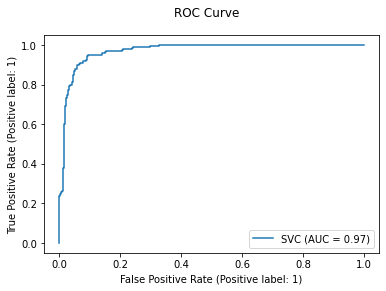

In [245]:
disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

Remarks: Here we have generated the ROC Curve for the final model and it shows the AUC score for the final model to be of 97%

# Confusion Matrix:

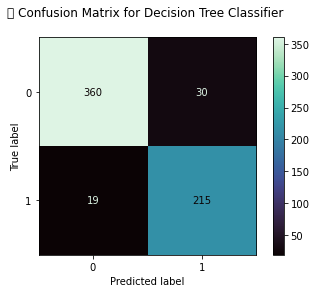

In [246]:
class_names = df_WO.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()

Remarks: From theabove confusion matrix we are able to understand the number of times we got the correct outputs and the number of times the model missed to provide the correct prediction (depicting in the black boxes)

# Saving the model:

In [247]:
import joblib
filename = "Wine_Quality.pkl"
joblib.dump(Final_Model, filename)

['Wine_Quality.pkl']

# Conclusion:

In [248]:
cnc = {"Original":np.array(Y_test),"Predicted":np.array(fmod_pred)}
cnc_df = pd.DataFrame(cnc)
cnc_df

,Original,Predicted
0,0,0
1,0,0
2,1,1
3,1,0
4,0,0
...,...,...
619,1,0
620,0,0
621,0,0
622,0,0


Remarks: Support Vector Classifier is performing with 92.14% of Accuracy.